In [1]:
import brick_gym.config as config 
from pathlib import Path
import json
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from IPython.display import Image
from tqdm.auto import tqdm
import psutil

In [21]:
with open(Path(config.paths['omr']) / 'scene_data.json') as f:
    path_data = json.load(f)
bigrams = {}                                                                    
for path in path_data:                                                           
    edge_data = path_data[path]['edge_data']                                    
    for pair in edge_data:                                                      
        bigrams[pair] = bigrams.get(pair, 0) + len(edge_data[pair])  

In [37]:
brick_types = set()
for path in path_data:
    brick_counts = path_data[path]["brick_counts"]
    for name in brick_counts:
        brick_types.add(name)
print(len(brick_types))

4234


In [38]:
set_sizes = []
for path in path_data:
    brick_counts = path_data[path]["brick_counts"]
    size = 0
    for name, count in brick_counts.items():
        size += count
    set_sizes.append(size)
set_sizes = np.array(set_sizes)
print(np.min(set_sizes))
print(np.max(set_sizes))
print(np.mean(set_sizes))
print(np.median(set_sizes))

0
7302
336.84182305630026
131.5


In [25]:
bigram_df = pd.DataFrame({'Count': sorted(list(bigrams.values()), reverse=True)})
bigram_df.reset_index(inplace=True)
bigram_df = bigram_df.rename(columns = {'index': 'Bigram Id'})
bigram_df['Bigram Id'] = bigram_df['Bigram Id'] + 1
bigram_df

,Bigram Id,Count
0,1,9713
1,2,3480
2,3,2057
3,4,1385
4,5,1165
...,...,...
50419,50420,1
50420,50421,1
50421,50422,1
50422,50423,1


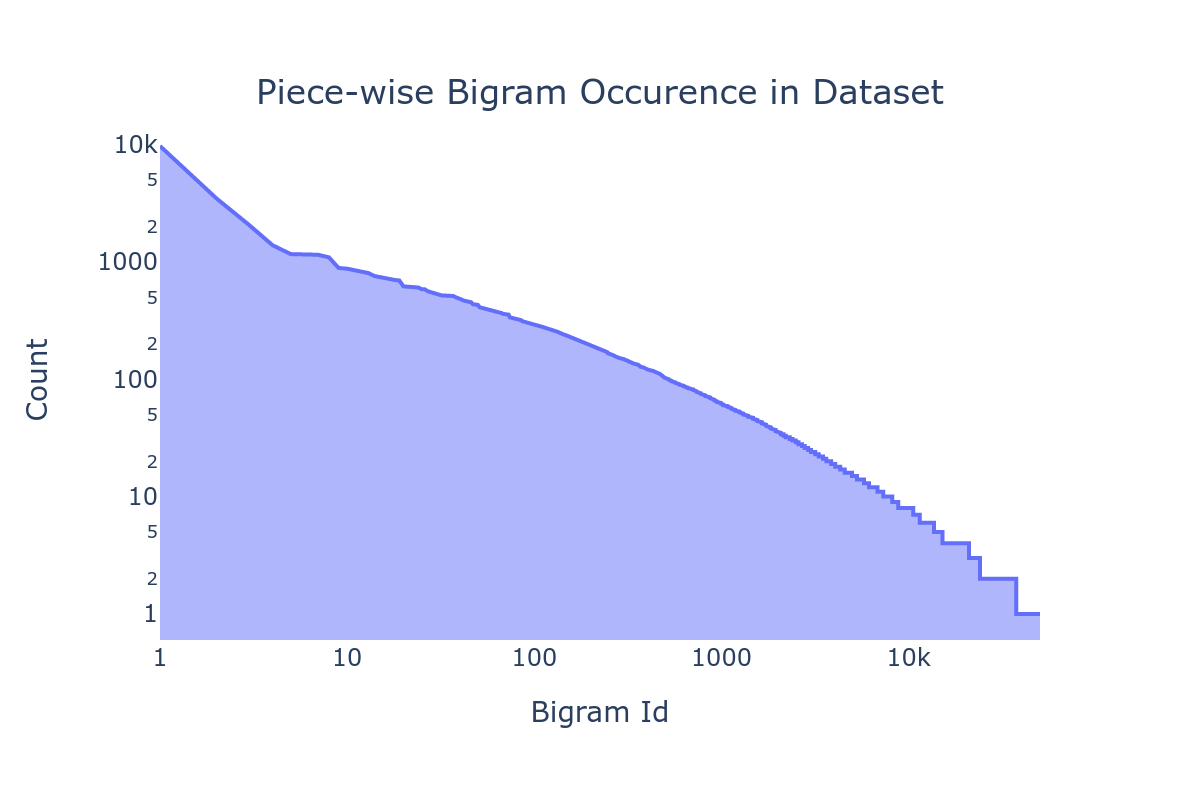

In [47]:
fig = px.area(bigram_df, x='Bigram Id', y='Count', log_y=True, log_x=True)
fig.update_layout(
    title={
        'text': "Piece-wise Bigram Occurence in Dataset",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    plot_bgcolor='#fff',
    paper_bgcolor='#fff',
)
img_bytes = fig.to_image(format="png", width=600, height=400, scale=2)
Image(img_bytes)
#fig.show()

In [7]:
bigrams_with_transform = {}                                                                    
transform_ids = {} 
for path in tqdm(path_data): 
    edge_data = path_data[path]['edge_data']                                    
    for pair in edge_data:                                                      
        transforms = [np.array(t) for t in edge_data[pair]]
        if pair not in transform_ids:
            transform_ids[pair] = []
        ids = transform_ids[pair]
        for transform in transforms:
            found = False
            for i, t in ids:
                if np.allclose(transform, t):
                    bigrams_with_transform[pair, i] = bigrams_with_transform.get((pair, i), 0) + 1
                    found = True
            if not found:
                if len(ids) == 0:
                    new_id = 0
                else:
                    new_id = ids[-1][0] + 1
                ids.append((new_id, transform))
                bigrams_with_transform[pair, new_id] = bigrams_with_transform.get((pair, new_id), 0) + 1

  0%|          | 0/1492 [00:00<?, ?it/s]

In [8]:
df = pd.DataFrame({'Count': sorted(list(bigrams_with_transform.values()), reverse=True)})
df.reset_index(inplace=True)
df = df.rename(columns = {'index': 'Bigram Id'})
df['Bigram Id'] = df['Bigram Id'] + 1
df

,Bigram Id,Count
0,1,1471
1,2,1171
2,3,1158
3,4,996
4,5,560
...,...,...
222674,222675,1
222675,222676,1
222676,222677,1
222677,222678,1


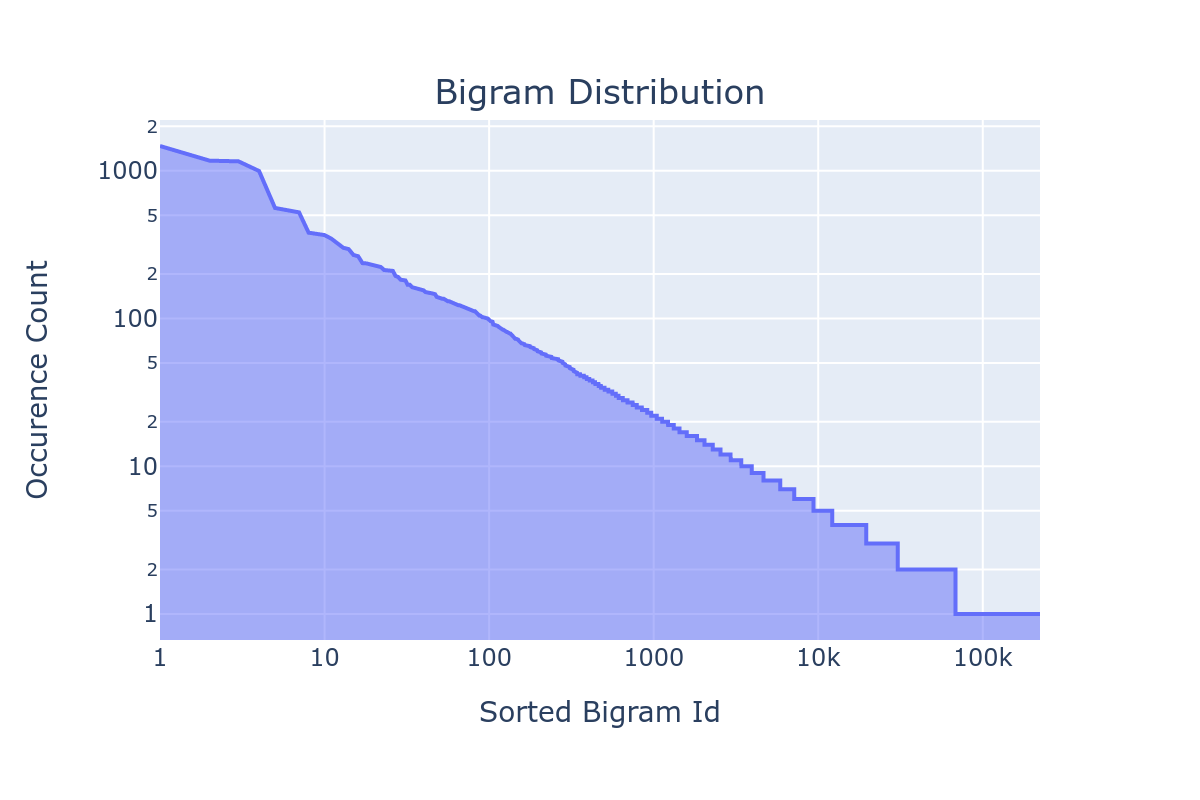

In [34]:
fig = px.area(df, x='Bigram Id', y='Count', log_y=True, log_x=True)
fig.update_layout(
    yaxis_title="Occurence Count",
    xaxis_title="Sorted Bigram Id",
    title={
        'text': "Bigram Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
img_bytes = fig.to_image(format="png", width=600, height=400, scale=2)
Image(img_bytes)

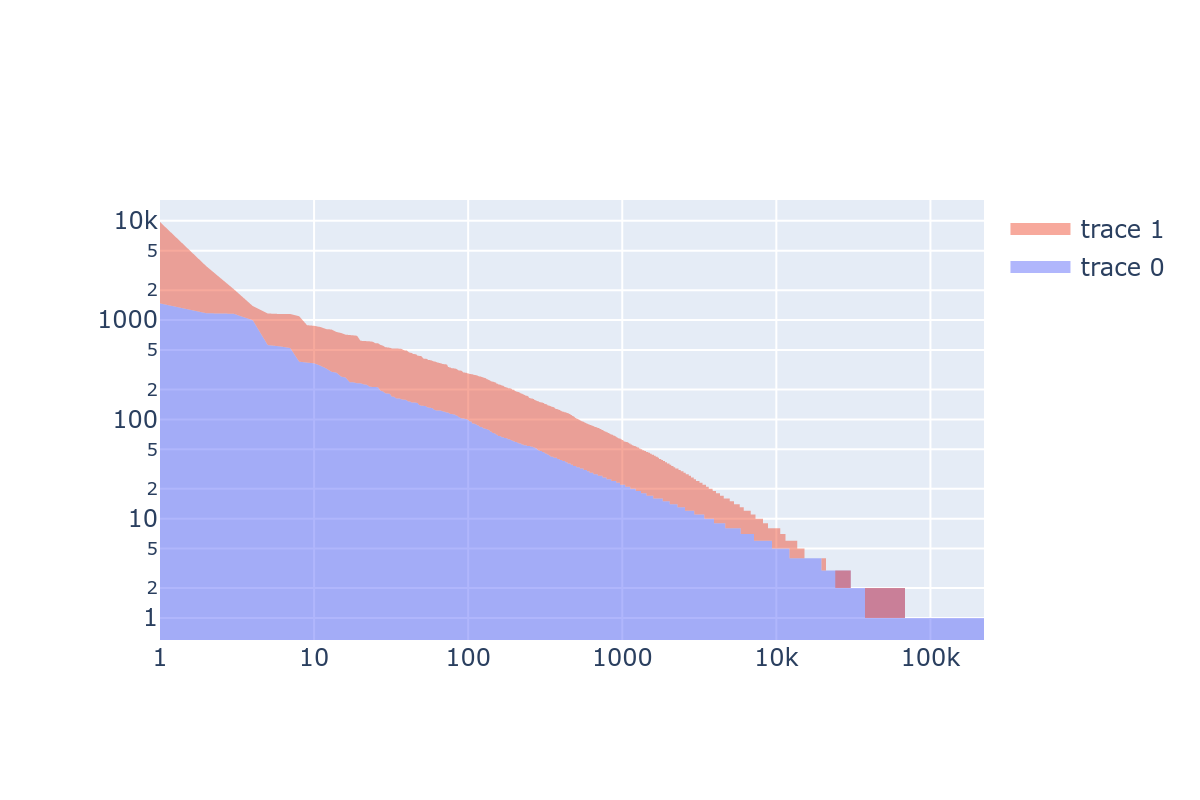

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Bigram Id'], y=df['Count'], fill='tozeroy', mode='none')) # fill down to xaxis
fig.add_trace(go.Scatter(x=bigram_df['Bigram Id'], y=bigram_df['Count'], fill='tonexty', mode='none')) # fill to trace0 y
fig.update_xaxes(type="log")
fig.update_yaxes(type="log")

img_bytes = fig.to_image(format="png", width=600, height=400, scale=2, engine='kaleido')
Image(img_bytes)

In [20]:
bigram_df

,Bigram Id,Count
0,2,1471
1,3,1171
2,4,1158
3,5,996
4,6,560
...,...,...
222674,222676,1
222675,222677,1
222676,222678,1
222677,222679,1
